In [1]:

import pandas as pd
import numpy as np
#preprocessing and split
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#plotting
import matplotlib.pyplot as plt
#clustering
from sklearn.cluster import KMeans


In [2]:
file_path = Path("myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
#Confirming datatypes
df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [4]:
#Finding null values in dataset if any
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values")


Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values
Column MYOPIC has 0 null values


In [5]:
#Removing column MYOPIC
df_myopia = df.drop(columns = "MYOPIC", axis = 1)
df_myopia.head()


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [6]:
#Checking for duplicate entries
print(f"Duplicate entries: {df_myopia.duplicated().sum()}")

Duplicate entries: 0


In [7]:
#Establishing myopic df
myopic = df["MYOPIC"]

In [8]:
#Fitting to Standard Scaler
scaler = StandardScaler()
X = scaler.fit_transform(df_myopia)

In [9]:
#Train and Test

# X = scaler.transform(df_myopia)

In [10]:
#Part 2: Apply Dimensionality Reduction

In [11]:
#PCA
pca = PCA(n_components = 0.9) #preserving 90%

#Fit with scaled xtrain data
myopia_pca_df = pca.fit_transform(X)

In [12]:
#Explaining variance ratio
print(f'Variance Ratio Array: {pca.explained_variance_ratio_}')

Variance Ratio Array: [0.21177355 0.15659716 0.08688023 0.08301762 0.07584858 0.06997878
 0.06486986 0.06377808 0.05393666 0.05205566]


In [13]:
#TSNE 
#initializing
tsne = TSNE(learning_rate=200)

#fit transform myopia_pca_df
tsne_features = tsne.fit_transform(myopia_pca_df)

c:\Users\lamot\anaconda3\envs\mlenv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [14]:
#The dataset has 2 columns
tsne_features.shape

(618, 2)

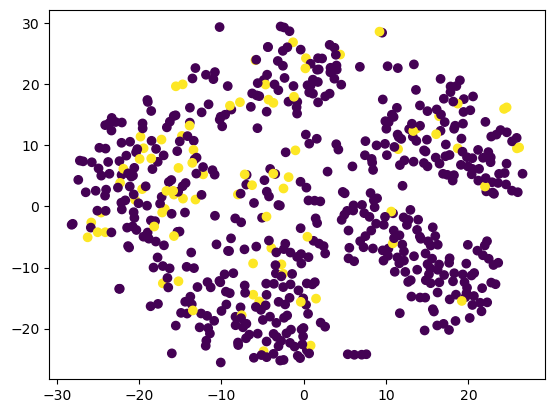

In [15]:
plt.scatter(tsne_features[:,0], tsne_features[:,1], c = myopic)
plt.show()

In [16]:
#No distinct Clusters

In [17]:
#Part 3: Perform a Cluster Analysis with K-means
#create dataframe with 2 principal components
df_pca = pd.DataFrame(tsne_features, columns=["comp_1", "comp_2"])
df_pca.head()

,comp_1,comp_2
0,-17.124950,-12.581306
1,-20.374340,8.860015
2,8.397671,-6.880555
3,24.636820,16.207644
4,9.515451,28.428558


In [21]:
inertia = []
k = list(range(1,11))

for i in k:
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(df_pca)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "Inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head


c:\Users\lamot\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


<bound method NDFrame.head of     k        Inertia
0   1  241002.609375
1   2  141852.484375
2   3   86262.023438
3   4   58301.433594
4   5   40380.773438
5   6   32490.941406
6   7   27763.974609
7   8   24625.257812
8   9   21928.910156
9  10   19155.859375>

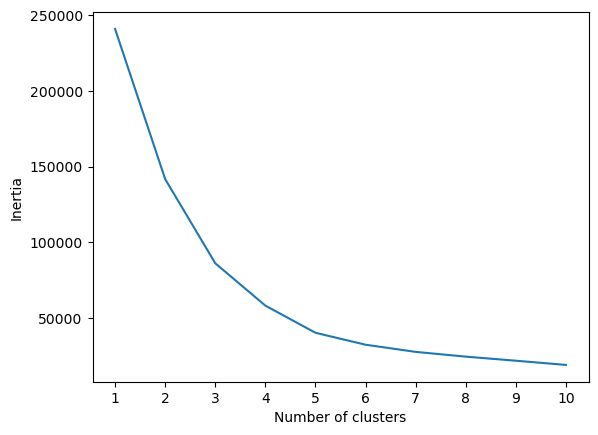

In [23]:

plt.plot(df_elbow['k'], df_elbow['Inertia'])
plt.xticks(range(1,11))

plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
#Part 4: Make a Recommendation
#I believe it is possible for these patients to be clustered, with the prime number of clusters being 4 or 5, based on observations made using the elbow chart. 